# 커피지수 과제
## 황 성 윤

### 1. 스타벅스(Starbucks)

- 참조사이트 : http://blog.naver.com/PostView.nhn?blogId=pjt3591oo&logNo=221189236488&parentCategoryNo=&categoryNo=116&viewDate=&isShowPopularPosts=true&from=search
- 필요한 정보를 crawling 하는 것이 생각보다 어려워서 일단 위의 사이트를 참조해서 crawling을 실시하였음.

In [9]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [10]:
import requests as rq

def get_dosi():   # 도시 code
    url = 'https://www.istarbucks.co.kr/store/getSidoList.do'
    res = rq.post(url, data={
        'rndCod' : '60ME8AU2N2'
    })
    dosi_list = res.json()
    result = []
    for dosi in dosi_list['list']:
        result.append(dosi['sido_cd'])
    return result

get_dosi()
# 서울 01, 경기 08, 광주 02, 대구 03, 대전 04, 부산 05, 울산 06, 인천 07,
# 강원 09, 경남 10, 경북 11, 전남 12, 전북 13, 충남 14, 충북 15, 제주 16,
# 세종 17
dosi_code = [code for code in get_dosi()]

In [11]:
def get_gugun(dosi_code): # 구, 군 code
    url = 'https://www.istarbucks.co.kr/store/getGugunList.do'
    res = rq.post(url, data={
        'sido_cd' : dosi_code,
        # 'rndCod' : '7UYM1V8BC7'
    })
    gugun_list = res.json()
    result = []
    for gugun in gugun_list['list']:
        result.append(gugun['gugun_cd'])
    return result

def get_stores1(dosi_code, gugun_code):
    url = 'https://www.istarbucks.co.kr/store/getStore.do?r=DQESA1HOUP'
    res = rq.post(url, data={
        'ins_lat' : '37.56682',
        'ins_lng' : '126.97865',
        'p_sido_cd' : dosi_code,
        'p_gugun_cd' : gugun_code,
        'in_biz_cd' : '',
        'set_date' : ''
    })
    store_list = res.json()
    for store in store_list['list']:
        return store['addr']
        
def get_stores2(dosi_code, gugun_code):
    url = 'https://www.istarbucks.co.kr/store/getStore.do?r=DQESA1HOUP'
    res = rq.post(url, data={
        'ins_lat' : '37.56682',
        'ins_lng' : '126.97865',
        'p_sido_cd' : dosi_code,
        'p_gugun_cd' : gugun_code,
        'in_biz_cd' : '',
        'set_date' : ''
    })
    store_list = res.json()
    for store in store_list['list']:
        return store['fax']

def get_stores3(dosi_code, gugun_code):
    url = 'https://www.istarbucks.co.kr/store/getStore.do?r=DQESA1HOUP'
    res = rq.post(url, data={
        'ins_lat' : '37.56682',
        'ins_lng' : '126.97865',
        'p_sido_cd' : dosi_code,
        'p_gugun_cd' : gugun_code,
        'in_biz_cd' : '',
        'set_date' : ''
    })
    store_list = res.json()
    for store in store_list['list']:
        return store['open_dt']
        
def get_stores4(dosi_code, gugun_code):
    url = 'https://www.istarbucks.co.kr/store/getStore.do?r=DQESA1HOUP'
    res = rq.post(url, data={
        'ins_lat' : '37.56682',
        'ins_lng' : '126.97865',
        'p_sido_cd' : dosi_code,
        'p_gugun_cd' : gugun_code,
        'in_biz_cd' : '',
        'set_date' : ''
    })
    store_list = res.json()
    for store in store_list['list']:
        return store['tel']        

In [12]:
import pandas as pd
import numpy as np

address = []
fax = []
open_date = []
tel = []

if __name__ == '__main__':
    for dosi_cd in get_dosi():
        for gugun_cd in get_gugun(dosi_cd):
            address.append(get_stores1(dosi_cd, gugun_cd)) # 주소
            fax.append(get_stores2(dosi_cd, gugun_cd)) # 팩스
            open_date.append(get_stores3(dosi_cd, gugun_cd)) # 개업일자
            tel.append(get_stores4(dosi_cd, gugun_cd)) # 전화번호

starbucks = pd.DataFrame({'주소' : address, '팩스' : fax, '개업일자' : open_date,
                         '전화번호' : tel})            

In [13]:
starbucks

,주소,팩스,개업일자,전화번호
0,서울특별시 강남구 논현동 5번지 2층,02-514-8429,20110907,02-758-8429
1,서울특별시 강동구 길동 459-4번지 1층,02-477-8342,20100824,02-758-8342
2,서울특별시 강북구 미아동 121-19번지,02-980-8501,20120425,02-758-8500
3,서울특별시 강서구 화곡동 343-1번지,02-2602-8538,20120905,02-758-8538
4,서울특별시 관악구 봉천동 869-1,02-875-8460,20120106,02-758-8460
5,"서울특별시 광진구 자양동 227-342 더 클래식500 1층 C102,103호",02-453-8519,20120629,02-758-8519
6,서울특별시 구로구 신도림동 360-50,02-3667-8424,20110826,02-2210-9797
7,서울특별시 금천구 가산동 60-5 갑을그레이트벨리 1층,02-3397-7346,20100910,02-758-8346
8,서울특별시 노원구 월계동 333-1번지,02-978-8573,20130205,02-758-8573
9,서울특별시 도봉구 창동 659-5번지,02-908-8691,20131206,02-758-8691


In [15]:
# csv 파일로 저장 후 엑셀을 이용하여 데이터 전처리 후 다시 불러들이기
starbucks.to_csv("data/starbucks.csv", encoding='EUC-KR', sep=',')

In [16]:
import numpy as np
import pandas as pd

starbucks = pd.read_csv("data/starbucks.csv", encoding='EUC-KR', sep=',')
starbucks

,주소,팩스,개업일자,전화번호
0,서울특별시 강남구 논현동 5번지 2층,02-514-8429,20110907,02-758-8429
1,서울특별시 강동구 길동 459-4번지 1층,02-477-8342,20100824,02-758-8342
2,서울특별시 강북구 미아동 121-19번지,02-980-8501,20120425,02-758-8500
3,서울특별시 강서구 화곡동 343-1번지,02-2602-8538,20120905,02-758-8538
4,서울특별시 관악구 봉천동 869-1,02-875-8460,20120106,02-758-8460
5,"서울특별시 광진구 자양동 227-342 더 클래식500 1층 C102,103호",02-453-8519,20120629,02-758-8519
6,서울특별시 구로구 신도림동 360-50,02-3667-8424,20110826,02-2210-9797
7,서울특별시 금천구 가산동 60-5 갑을그레이트벨리 1층,02-3397-7346,20100910,02-758-8346
8,서울특별시 노원구 월계동 333-1번지,02-978-8573,20130205,02-758-8573
9,서울특별시 도봉구 창동 659-5번지,02-908-8691,20131206,02-758-8691


In [17]:
len(starbucks['주소'])

162

In [18]:
starbucks['주소'][0].split(' ')

['서울특별시', '강남구', '논현동', '5번지', '2층']

In [19]:
city1 = [] # 광역시도
city2 = [] # 시도

for i in range(len(starbucks['주소'])):
    addr = starbucks['주소'][i].split(' ')
    city1.append(addr[0])
    city2.append(addr[1])
    
len(city1), len(city2)    

(162, 162)

In [20]:
starbucks['광역시도'] = city1
starbucks['시도'] = city2
starbucks.to_csv("data/starbucks.csv", encoding='EUC-KR', sep=',')
starbucks.head()

,주소,팩스,개업일자,전화번호,광역시도,시도
0,서울특별시 강남구 논현동 5번지 2층,02-514-8429,20110907,02-758-8429,서울특별시,강남구
1,서울특별시 강동구 길동 459-4번지 1층,02-477-8342,20100824,02-758-8342,서울특별시,강동구
2,서울특별시 강북구 미아동 121-19번지,02-980-8501,20120425,02-758-8500,서울특별시,강북구
3,서울특별시 강서구 화곡동 343-1번지,02-2602-8538,20120905,02-758-8538,서울특별시,강서구
4,서울특별시 관악구 봉천동 869-1,02-875-8460,20120106,02-758-8460,서울특별시,관악구


In [21]:
# 엑셀로 데이터 처리 후 다시 불러들이기
starbucks = pd.read_csv("data/starbucks.csv", encoding='EUC-KR', sep=',')
starbucks.head()

,Unnamed: 0,주소,팩스,개업일자,전화번호,광역시도,시도
0,0,서울특별시 강남구 논현동 5번지 2층,02-514-8429,20110907,02-758-8429,서울특별시,강남구
1,1,서울특별시 강동구 길동 459-4번지 1층,02-477-8342,20100824,02-758-8342,서울특별시,강동구
2,2,서울특별시 강북구 미아동 121-19번지,02-980-8501,20120425,02-758-8500,서울특별시,강북구
3,3,서울특별시 강서구 화곡동 343-1번지,02-2602-8538,20120905,02-758-8538,서울특별시,강서구
4,4,서울특별시 관악구 봉천동 869-1,02-875-8460,20120106,02-758-8460,서울특별시,관악구


In [22]:
starbucks['스타벅스 입점'] = 1
del starbucks['Unnamed: 0']
starbucks.head()

,주소,팩스,개업일자,전화번호,광역시도,시도,스타벅스 입점
0,서울특별시 강남구 논현동 5번지 2층,02-514-8429,20110907,02-758-8429,서울특별시,강남구,1
1,서울특별시 강동구 길동 459-4번지 1층,02-477-8342,20100824,02-758-8342,서울특별시,강동구,1
2,서울특별시 강북구 미아동 121-19번지,02-980-8501,20120425,02-758-8500,서울특별시,강북구,1
3,서울특별시 강서구 화곡동 343-1번지,02-2602-8538,20120905,02-758-8538,서울특별시,강서구,1
4,서울특별시 관악구 봉천동 869-1,02-875-8460,20120106,02-758-8460,서울특별시,관악구,1


In [26]:
starbucks_enter = pd.pivot_table(starbucks, index = ['광역시도', '시도'],
                      values = ['스타벅스 입점'], aggfunc = 'sum')
starbucks_enter.to_csv("data/starbucks_enter.csv", encoding='EUC-KR', sep=',')
starbucks_enter

스타벅스 입점
광역시도    시도           
강원도     강릉시         1
        고성군         1
        동해시         1
        속초시         1
        원주시         1
        춘천시         1
        홍천군         1
경기도     고양시         3
        과천시         1
        광명시         1
        광주시         1
        구리시         1
        군포시         1
        김포시         1
        남양주시        1
        동두천시        1
        부천시         3
        성남시         3
        수원시         4
        시흥시         1
        안산시         2
        안성시         1
        안양시         2
        양주시         1
        양평군         1
        여주시         1
        오산시         1
        용인시         3
        의왕시         1
        의정부시        1
...               ...
인천광역시   계양구         1
        남동구         1
        동구          1
        미추홀구        1
        부평구         1
        서구          1
        연수구         1
        중구          1
전라남도    광양시         1
        나주시         1
        목포시         1
        무안군         1
        순천시         1
        여수시         1
전라북도    군산시         1
        익산시         1
        전주시         2
        정읍시         1
제주특별자치도 서귀포시        1
        제주시         1
충청남도    계룡시         1
        공주시         1
        논산시         1
        당진군         1
        서산시         1
        아산시         1
        천안시         2
충청북도    제천시         1
        청주시         4
        충주시         1

[143 rows x 1 columns]

In [27]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 7 columns):
주소         162 non-null object
팩스         162 non-null object
개업일자       162 non-null int64
전화번호       162 non-null object
광역시도       162 non-null object
시도         162 non-null object
스타벅스 입점    162 non-null int64
dtypes: int64(2), object(5)
memory usage: 8.9+ KB


In [28]:
starbucks_enter.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 143 entries, (강원도, 강릉시) to (충청북도, 충주시)
Data columns (total 1 columns):
스타벅스 입점    143 non-null int64
dtypes: int64(1)
memory usage: 2.6+ KB


In [32]:
starbucks['시도'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구', '고양시', '과천시',
       '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시', '동두천시', '부천시', '성남시',
       '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시', '양평군', '여주시', '오산시',
       '용인시', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시', '화성시',
       '광산구', '남구', '동구', '북구', '서구', '달서구', '달성군', '수성구', '대덕구', '유성구',
       '금정구', '기장군', '동래구', '부산진구', '사상구', '사하구', '수영구', '연제구', '해운대구',
       '울주군', '계양구', '남동구', '미추홀구', '부평구', '연수구', '강릉시', '고성군', '동해시',
       '속초시', '원주시', '춘천시', '홍천군', '거제시', '김해시', '사천시', '양산시', '진주시',
       '창원시', '통영시', '경산시', '경주시', '구미시', '김천시', '문경시', '안동시', '포항시',
       '광양시', '나주시', '목포시', '무안군', '순천시', '여수시', '군산시', '익산시', '전주시',
       '정읍시', '계룡시', '공주시', '논산시', '당진군', '서산시', '아산시', '천안시', '제천시',
       '청주시', '충주시', '서귀포시', '제주시', '어진동'], dtype=object)

In [52]:
si_name = [None] * len(starbucks_enter)

tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'], 
                       '성남':['수정구', '중원구', '분당구'], 
                       '안양':['만안구', '동안구'], 
                       '안산':['상록구', '단원구'], 
                       '고양':['덕양구', '일산동구', '일산서구'], 
                       '용인':['처인구', '기흥구', '수지구'], 
                       '청주':['상당구', '서원구', '흥덕구', '청원구'], 
                       '천안':['동남구', '서북구'], 
                       '전주':['완산구', '덕진구'], 
                       '포항':['남구', '북구'], 
                       '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], 
                       '부천':['오정구', '원미구', '소사구']}

In [33]:
starbucks_enter

스타벅스 입점
광역시도    시도           
강원도     강릉시         1
        고성군         1
        동해시         1
        속초시         1
        원주시         1
        춘천시         1
        홍천군         1
경기도     고양시         3
        과천시         1
        광명시         1
        광주시         1
        구리시         1
        군포시         1
        김포시         1
        남양주시        1
        동두천시        1
        부천시         3
        성남시         3
        수원시         4
        시흥시         1
        안산시         2
        안성시         1
        안양시         2
        양주시         1
        양평군         1
        여주시         1
        오산시         1
        용인시         3
        의왕시         1
        의정부시        1
...               ...
인천광역시   계양구         1
        남동구         1
        동구          1
        미추홀구        1
        부평구         1
        서구          1
        연수구         1
        중구          1
전라남도    광양시         1
        나주시         1
        목포시         1
        무안군         1
        순천시         1
        여수시         1
전라북도    군산시         1
        익산시         1
        전주시         2
        정읍시         1
제주특별자치도 서귀포시        1
        제주시         1
충청남도    계룡시         1
        공주시         1
        논산시         1
        당진군         1
        서산시         1
        아산시         1
        천안시         2
충청북도    제천시         1
        청주시         4
        충주시         1

[143 rows x 1 columns]

In [54]:
for n in starbucks.index:
    if starbucks['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        if starbucks['시도'][n][:-1]=='고성' and starbucks['광역시도'][n]=='강원도':
            si_name[n] = '고성(강원)'
        elif starbucks['시도'][n][:-1]=='고성' and starbucks['광역시도'][n]=='경상남도':
            si_name[n] = '고성(경남)'
        else:
             si_name[n] = starbucks['시도'][n][:-1]
                
        for keys, values in tmp_gu_dict.items():
            if starbucks['시도'][n] in values:
                if len(starbucks['시도'][n])==2:
                    si_name[n] = keys + ' ' + starbucks['시도'][n]
                elif starbucks['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + starbucks['시도'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + starbucks['시도'][n][:-1]
        
    elif starbucks['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
        
    else:
        if len(starbucks['시도'][n])==2:
            si_name[n] = starbucks['광역시도'][n][:2] + ' ' + starbucks['시도'][n]
        else:
            si_name[n] = starbucks['광역시도'][n][:2] + ' ' + starbucks['시도'][n][:-1]

In [55]:
si_name

['서울 강남',
 '서울 강동',
 '서울 강북',
 '서울 강서',
 '서울 관악',
 '서울 광진',
 '서울 구로',
 '서울 금천',
 '서울 노원',
 '서울 도봉',
 '서울 동대문',
 '서울 동작',
 '서울 마포',
 '서울 서대문',
 '서울 서초',
 '서울 성동',
 '서울 성북',
 '서울 송파',
 '서울 양천',
 '서울 영등포',
 '서울 용산',
 '서울 은평',
 '서울 종로',
 '서울 중구',
 '서울 중랑',
 '고양',
 '고양',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '김포',
 '남양주',
 '동두천',
 '부천',
 '부천',
 '부천',
 '성남',
 '성남',
 '성남',
 '수원',
 '수원',
 '수원',
 '수원',
 '시흥',
 '안산',
 '안산',
 '안성',
 '안양',
 '안양',
 '양주',
 '양평',
 '여주',
 '오산',
 '용인',
 '용인',
 '용인',
 '의왕',
 '의정부',
 '이천',
 '파주',
 '평택',
 '포천',
 '하남',
 '화성',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 달서',
 '대구 달성',
 '대구 동구',
 '대구 북구',
 '대구 서구',
 '대구 수성',
 '대구 중구',
 '대전 대덕',
 '대전 동구',
 '대전 서구',
 '대전 유성',
 '대전 중구',
 '부산 강서',
 '부산 금정',
 '부산 기장',
 '부산 남구',
 '부산 동구',
 '부산 동래',
 '부산 부산진',
 '부산 북구',
 '부산 사상',
 '부산 사하',
 '부산 서구',
 '부산 수영',
 '부산 연제',
 '부산 중구',
 '부산 해운대',
 '울산 남구',
 '울산 동구',
 '울산 북구',
 '울산 울주',
 '울산 중구',
 '인천 계양',
 '인천 남동',
 '인천 동구',
 '인천 미추홀',
 '인천 부평',
 '인천 서구',
 '인천 연수',
 '인천 중구

In [56]:
starbucks['ID'] = si_name

In [57]:
starbucks.head()

,주소,팩스,개업일자,전화번호,광역시도,시도,스타벅스 입점,ID
0,서울특별시 강남구 논현동 5번지 2층,02-514-8429,20110907,02-758-8429,서울특별시,강남구,1,서울 강남
1,서울특별시 강동구 길동 459-4번지 1층,02-477-8342,20100824,02-758-8342,서울특별시,강동구,1,서울 강동
2,서울특별시 강북구 미아동 121-19번지,02-980-8501,20120425,02-758-8500,서울특별시,강북구,1,서울 강북
3,서울특별시 강서구 화곡동 343-1번지,02-2602-8538,20120905,02-758-8538,서울특별시,강서구,1,서울 강서
4,서울특별시 관악구 봉천동 869-1,02-875-8460,20120106,02-758-8460,서울특별시,관악구,1,서울 관악


In [58]:
starbucks.to_csv("data/starbucks.csv", encoding='EUC-KR', sep=',')

In [59]:
draw_korea_raw = pd.read_excel('data/05. draw_korea_raw.xlsx', 
                               encoding="EUC-KR")
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack()) 
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, 
                              inplace=True)
draw_korea = draw_korea_raw_stacked
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

In [60]:
set(draw_korea['ID'].unique()) - set(starbucks['ID'].unique())

{'가평',
 '강진',
 '거창',
 '고령',
 '고성(경남)',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '고창',
 '고흥',
 '곡성',
 '괴산',
 '구례',
 '군위',
 '금산',
 '김제',
 '남원',
 '남해',
 '단양',
 '담양',
 '대구 남구',
 '무주',
 '밀양',
 '보령',
 '보성',
 '보은',
 '봉화',
 '부산 영도',
 '부안',
 '부여',
 '부천 소사',
 '부천 오정',
 '부천 원미',
 '산청',
 '삼척',
 '상주',
 '서천',
 '성남 분당',
 '성남 수정',
 '성남 중원',
 '성주',
 '수원 권선',
 '수원 영통',
 '수원 장안',
 '수원 팔달',
 '순창',
 '신안',
 '안산 단원',
 '안산 상록',
 '안양 동안',
 '안양 만안',
 '양구',
 '양양',
 '연천',
 '영광',
 '영덕',
 '영동',
 '영암',
 '영양',
 '영월',
 '영주',
 '영천',
 '예산',
 '예천',
 '옥천',
 '완도',
 '완주',
 '용인 기흥',
 '용인 수지',
 '용인 처인',
 '울릉',
 '울진',
 '음성',
 '의령',
 '의성',
 '인제',
 '인천 강화',
 '인천 남구',
 '인천 옹진',
 '임실',
 '장성',
 '장수',
 '장흥',
 '전주 덕진',
 '전주 완산',
 '정선',
 '증평',
 '진도',
 '진안',
 '진천',
 '창녕',
 '창원 성산',
 '창원 의창',
 '창원 진해',
 '창원 합포',
 '창원 회원',
 '천안 동남',
 '천안 서북',
 '철원',
 '청도',
 '청송',
 '청양',
 '청주 상당',
 '청주 서원',
 '청주 청원',
 '청주 흥덕',
 '칠곡',
 '태백',
 '태안',
 '평창',
 '포항 남구',
 '포항 북구',
 '하동',
 '함안',
 '함양',
 '함평',
 '합천',
 '해남',
 '홍성',
 '화순',
 '화천',
 '횡성'}

In [61]:
set(starbucks['ID'].unique()) - set(draw_korea['ID'].unique())

{'고양',
 '부천',
 '성남',
 '수원',
 '안산',
 '안양',
 '용인',
 '인천 미추홀',
 '전주',
 '창원',
 '천안',
 '청주',
 '포항'}

In [62]:
tmp_list = list(set(starbucks['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    starbucks = starbucks.drop(starbucks[starbucks['ID']==tmp].index)
                       
print(set(starbucks['ID'].unique()) - set(draw_korea['ID'].unique()))

set()


In [63]:
starbucks.head()

,주소,팩스,개업일자,전화번호,광역시도,시도,스타벅스 입점,ID
0,서울특별시 강남구 논현동 5번지 2층,02-514-8429,20110907,02-758-8429,서울특별시,강남구,1,서울 강남
1,서울특별시 강동구 길동 459-4번지 1층,02-477-8342,20100824,02-758-8342,서울특별시,강동구,1,서울 강동
2,서울특별시 강북구 미아동 121-19번지,02-980-8501,20120425,02-758-8500,서울특별시,강북구,1,서울 강북
3,서울특별시 강서구 화곡동 343-1번지,02-2602-8538,20120905,02-758-8538,서울특별시,강서구,1,서울 강서
4,서울특별시 관악구 봉천동 869-1,02-875-8460,20120106,02-758-8460,서울특별시,관악구,1,서울 관악


In [64]:
starbucks = pd.merge(starbucks, draw_korea, how='left', on=['ID'])

starbucks.head()

,주소,팩스,개업일자,전화번호,광역시도,시도,스타벅스 입점,ID,y,x
0,서울특별시 강남구 논현동 5번지 2층,02-514-8429,20110907,02-758-8429,서울특별시,강남구,1,서울 강남,8,6
1,서울특별시 강동구 길동 459-4번지 1층,02-477-8342,20100824,02-758-8342,서울특별시,강동구,1,서울 강동,5,8
2,서울특별시 강북구 미아동 121-19번지,02-980-8501,20120425,02-758-8500,서울특별시,강북구,1,서울 강북,3,5
3,서울특별시 강서구 화곡동 343-1번지,02-2602-8538,20120905,02-758-8538,서울특별시,강서구,1,서울 강서,6,4
4,서울특별시 관악구 봉천동 869-1,02-875-8460,20120106,02-758-8460,서울특별시,관악구,1,서울 관악,7,5


In [66]:
mapdata = starbucks.pivot_table(index='y', columns='x', values='스타벅스 입점')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
mapdata

x,0,1,2,3,4,5,6,7,8,9,10,11,12
y,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN
4,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN
5,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
6,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
7,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN
8,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN


In [67]:
masked_mapdata

masked_array(
  data=[[--, --, --, --, --, --, --, --, --, --, 1.0, --, --],
        [--, --, --, 1.0, 1.0, --, 1.0, 1.0, --, 1.0, 1.0, --, --],
        [--, --, --, --, --, 1.0, 1.0, 1.0, 1.0, --, --, --, --],
        [--, --, 1.0, --, 1.0, 1.0, 1.0, --, 1.0, 1.0, --, 1.0, --],
        [--, --, --, --, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, --, 1.0, --],
        [--, --, --, --, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, --, --],
        [--, 1.0, --, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, --, --, --],
        [--, 1.0, 1.0, --, 1.0, 1.0, 1.0, --, 1.0, 1.0, --, --, --],
        [--, --, 1.0, --, 1.0, 1.0, 1.0, --, --, --, 1.0, --, --],
        [--, 1.0, --, 1.0, 1.0, 1.0, 1.0, --, --, --, 1.0, --, --],
        [--, 1.0, 1.0, 1.0, 1.0, --, --, 1.0, --, --, 1.0, --, --],
        [--, 1.0, --, --, 1.0, --, --, --, --, 1.0, --, --, --],
        [--, 1.0, --, --, 1.0, --, 1.0, --, --, --, --, 1.0, 1.0],
        [--, 1.0, --, --, 1.0, 1.0, --, --, --, --, --, --, 1.0],
        [--, --, --, 1.0, 1.0, 1.0, --, --

In [68]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

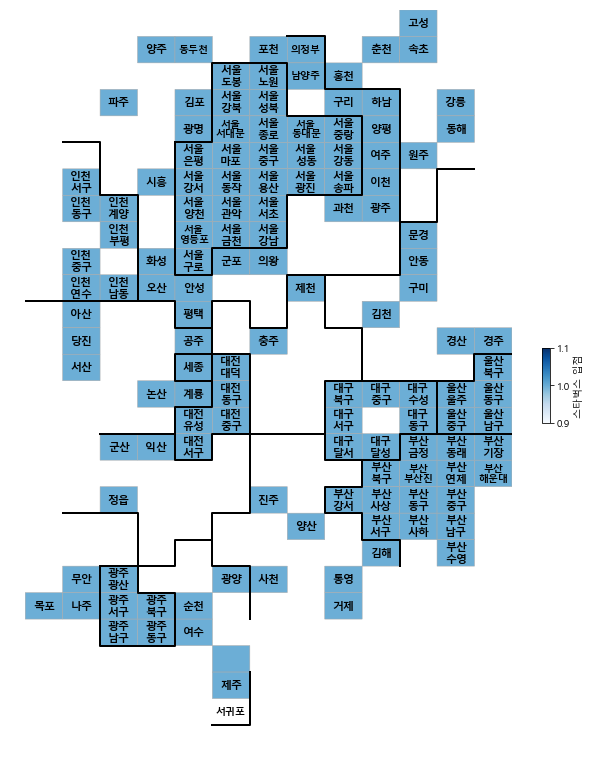

In [71]:
drawKorea('스타벅스 입점', starbucks, 'Blues')

### 2. 커피빈(Coffee Bean)

### 3. 에디야(Ediya)

### 4. 빽다방